<h1>TASK 3. ALGORITHMS FOR UNCONSTRAINED NONLINEAR OPTIMIZATION. FIRST- AND SECONDORDER</h1>

<a name='000'></a>

<h2>Content</h2>

<ul>
    <ol type='1'>
    <li><a href='#001'>Environment configuration</a></li>
    <li><a href='#002'>Appendix to Section I</a></li>
    </ol>
</ul>

<a name='001'></a>

<h2>Environment configuration</h2>

In [1]:
import numpy as np
import scipy.optimize
from autograd import jacobian
import matplotlib.pyplot as plt
import warnings
import random

In [2]:
warnings.filterwarnings(action='ignore')
random.seed(0)

<a name='002'></a>

<h2>Appendix to Section I</h2>

Implementing the functions and the range of values of the functions.

In [3]:
alpha = np.random.random()
beta = np.random.random()
noise = np.random.normal(0, 1, 100)
epsilon = 0.001

x_k = np.arange(0, 1, 0.01)
y_k = [alpha * x_k[k] + beta + noise[k] for k in range(len(x_k))]

In [4]:
def linear_approximant(x, a, b):
    return a * x + b

def rational_approximant(x, a, b):
    return a / (1 + b * x)

In [5]:
def loss_function(x, function):
    amount = 0
    
    for i in range(100):
        amount = amount + np.power(function(x_k[i], x[0], x[1]) - y_k[i], 2)
    
    return amount

Implementing the algorithms of exhaustive search, Gauss and Nelder-Mead.

In [6]:
def gradient_descent(function, args):
    return scipy.optimize.minimize(
        function,
        x0=(0, 0),
        method='BFGS',
        args=(args,),
        tol=epsilon
    )

def conjugate_gradient_descent(function, args):
    return scipy.optimize.minimize(
        function,
        x0=(0, 0),
        method='CG',
        args=(args,),
        tol=epsilon
    )

def newtons_method(function, args):
    return scipy.optimize.minimize(
        function,
        x0=(0, 0),
        method='Newton-CG',
        jac=jacobian(function),
        args=(args,),
        tol=epsilon
    )

def levenberg_marquardt_algorithm(function, x, y):
    return scipy.optimize.curve_fit(
        function,
        xdata=x,
        ydata=y,
        method='lm'
    )

In [7]:
gradient_lower, gradient_higher = gradient_descent(loss_function, linear_approximant).x

print('Gradient descent arguments: {:.6f}, {:.6f}'.format(gradient_lower, gradient_higher))

Gradient descent arguments: 0.499114, 0.119546


In [8]:
conjugate_lower, conjugate_higher = conjugate_gradient_descent(loss_function, linear_approximant).x

print('Conjugate gradient descent arguments: {:.6f}, {:.6f}'.format(conjugate_lower, conjugate_higher))

Conjugate gradient descent arguments: 0.499114, 0.119547


In [9]:
newtons_lower, newtons_higher = newtons_method(loss_function, linear_approximant).x

print('Newtons method arguments: {:.6f}, {:.6f}'.format(newtons_lower, newtons_higher))

Newtons method arguments: 0.499114, 0.119546


In [10]:
levenberg_lower, levenberg_higher = levenberg_marquardt_algorithm(linear_approximant, x_k, y_k)[0]

print('Levenberg-Marquardt algorithm arguments: {:.6f}, {:.6f}'.format(levenberg_lower, levenberg_higher))

Levenberg-Marquardt algorithm arguments: 0.499114, 0.119546


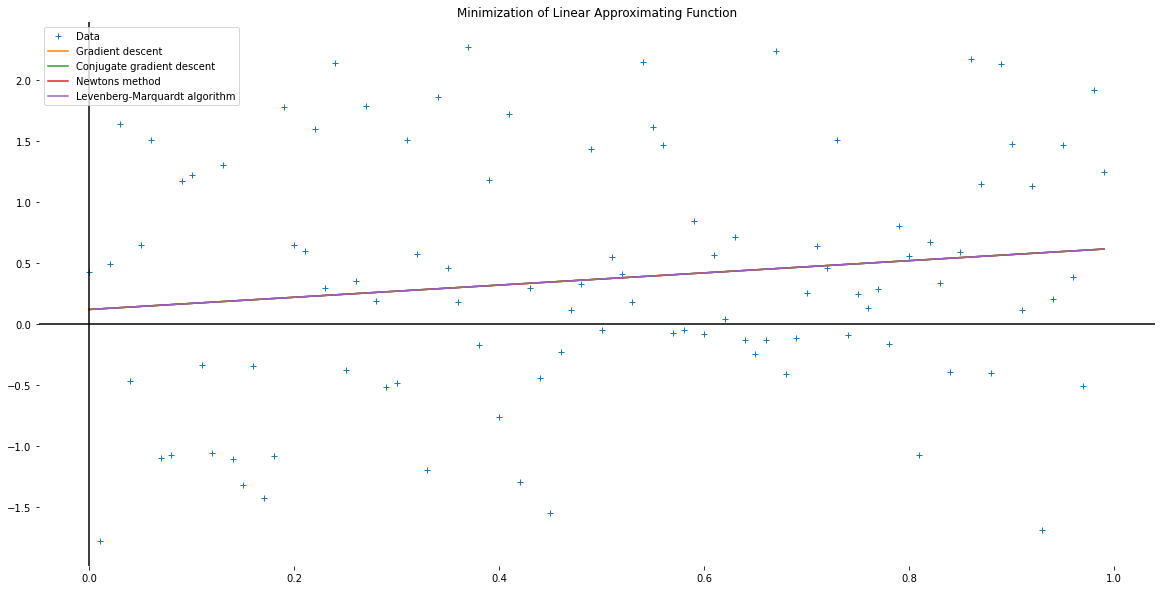

In [11]:
plt.figure(figsize=(20, 10))
plt.plot(x_k, y_k, '+', label='Data')

y = [linear_approximant(x, gradient_lower, gradient_higher) for x in x_k]
plt.plot(x_k, y, label='Gradient descent')

y = [linear_approximant(x, conjugate_lower, conjugate_higher) for x in x_k]
plt.plot(x_k, y, label='Conjugate gradient descent')

y = [linear_approximant(x, newtons_lower, newtons_higher) for x in x_k]
plt.plot(x_k, y, label='Newtons method')

y = [linear_approximant(x, levenberg_lower, levenberg_higher) for x in x_k]
plt.plot(x_k, y, label='Levenberg-Marquardt algorithm')

ax = plt.gca()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_title('Minimization of Linear Approximating Function')
ax.legend()

plt.show()

In [12]:
gradient_lower, gradient_higher = gradient_descent(loss_function, rational_approximant).x

print('Gradient descent arguments: {:.6f}, {:.6f}'.format(gradient_lower, gradient_higher))

Gradient descent arguments: 0.209032, -0.721034


In [13]:
conjugate_lower, conjugate_higher = conjugate_gradient_descent(loss_function, rational_approximant).x

print('Conjugate gradient descent arguments: {:.6f}, {:.6f}'.format(conjugate_lower, conjugate_higher))

Conjugate gradient descent arguments: 0.209032, -0.721034


In [14]:
newtons_lower, newtons_higher = newtons_method(loss_function, rational_approximant).x

print('Newtons method arguments: {:.6f}, {:.6f}'.format(newtons_lower, newtons_higher))

Newtons method arguments: 0.209030, -0.721043


In [15]:
levenberg_lower, levenberg_higher = levenberg_marquardt_algorithm(rational_approximant, x_k, y_k)[0]

print('Levenberg-Marquardt algorithm arguments: {:.6f}, {:.6f}'.format(levenberg_lower, levenberg_higher))

Levenberg-Marquardt algorithm arguments: 0.209031, -0.721037


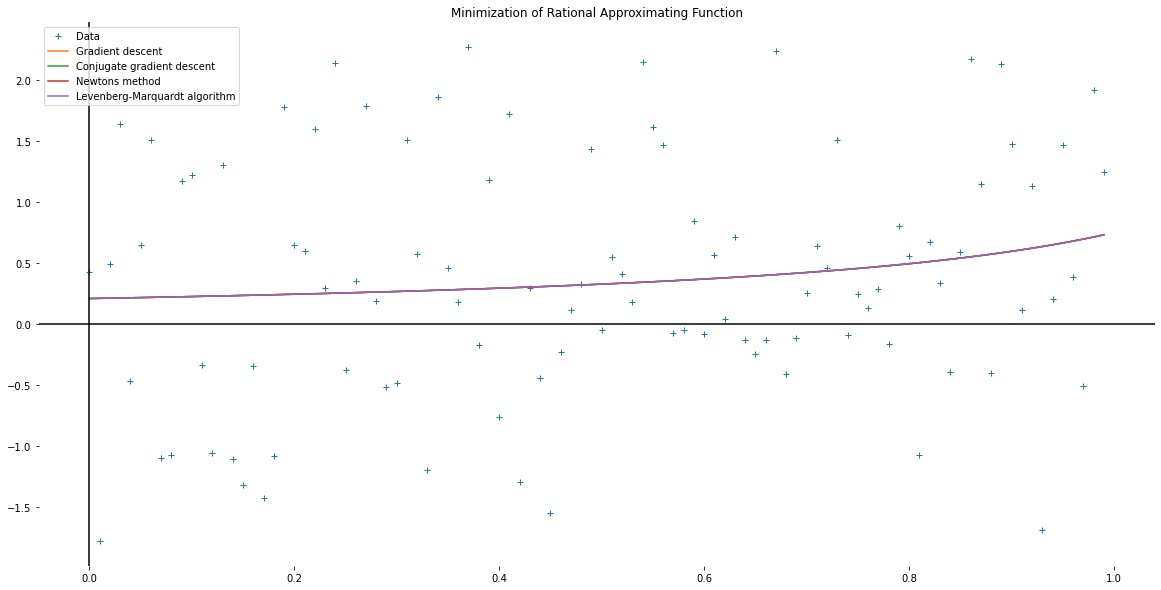

In [16]:
plt.figure(figsize=(20, 10))
plt.plot(x_k, y_k, '+', label='Data')

y = [rational_approximant(x, gradient_lower, gradient_higher) for x in x_k]
plt.plot(x_k, y, label='Gradient descent')

y = [rational_approximant(x, conjugate_lower, conjugate_higher) for x in x_k]
plt.plot(x_k, y, label='Conjugate gradient descent')

y = [rational_approximant(x, newtons_lower, newtons_higher) for x in x_k]
plt.plot(x_k, y, label='Newtons method')

y = [rational_approximant(x, levenberg_lower, levenberg_higher) for x in x_k]
plt.plot(x_k, y, label='Levenberg-Marquardt algorithm')

ax = plt.gca()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_title('Minimization of Rational Approximating Function')
ax.legend()

plt.show()